In [1]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import os

In [2]:
from glob import glob
file_list=glob("D:/jupyter notebook/10 samples/*.wav")
for i,file in enumerate(file_list):
    print(f'{i}:{file}')

0:D:/jupyter notebook/10 samples\sample01.wav
1:D:/jupyter notebook/10 samples\sample02.wav
2:D:/jupyter notebook/10 samples\sample03.wav
3:D:/jupyter notebook/10 samples\sample04.wav
4:D:/jupyter notebook/10 samples\sample05.wav
5:D:/jupyter notebook/10 samples\sample06.wav
6:D:/jupyter notebook/10 samples\sample07.wav
7:D:/jupyter notebook/10 samples\sample08.wav
8:D:/jupyter notebook/10 samples\sample09.wav
9:D:/jupyter notebook/10 samples\sample10.wav


In [51]:
import IPython.display as ipd
ipd.Audio(file_list[2])

In [42]:
fox, sr = librosa.load(file_list[0], sr=None)
s, sr = librosa.load(file_list[1], sr=None)
p, sr = librosa.load(file_list[2], sr=None)

In [5]:
from librosa.util import normalize
n_fox=normalize(fox)
n_s=normalize(s)
n_p=normalize(p)

In [6]:
FRAME_SIZE=2048
HOP_SIZE=512

In [7]:
S_fox = librosa.stft(fox,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [8]:
S_fox.shape

(1025, 469)

In [9]:
type(S_fox[0][0])

numpy.complex64

In [10]:
Y_fox=np.abs(S_fox)**2

In [11]:
Y_fox.shape

(1025, 469)

In [12]:
type(Y_fox[0][0])

numpy.float32

In [13]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis='time',
                             y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")

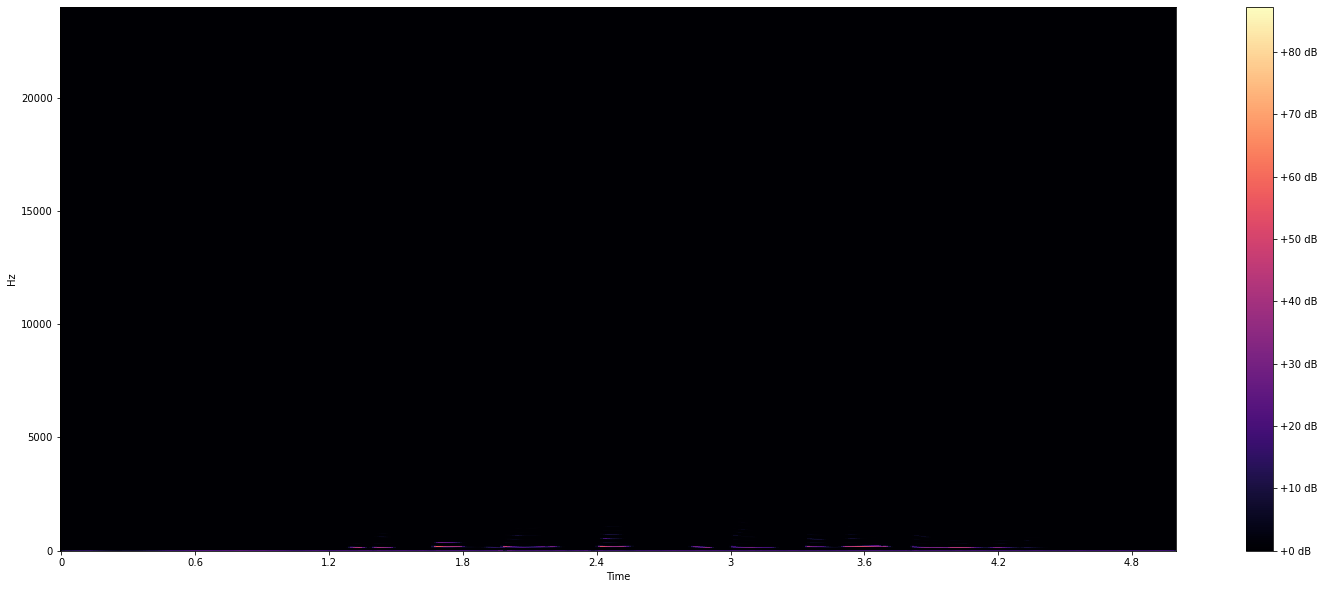

In [14]:
plot_spectrogram(Y_fox,sr,HOP_SIZE)

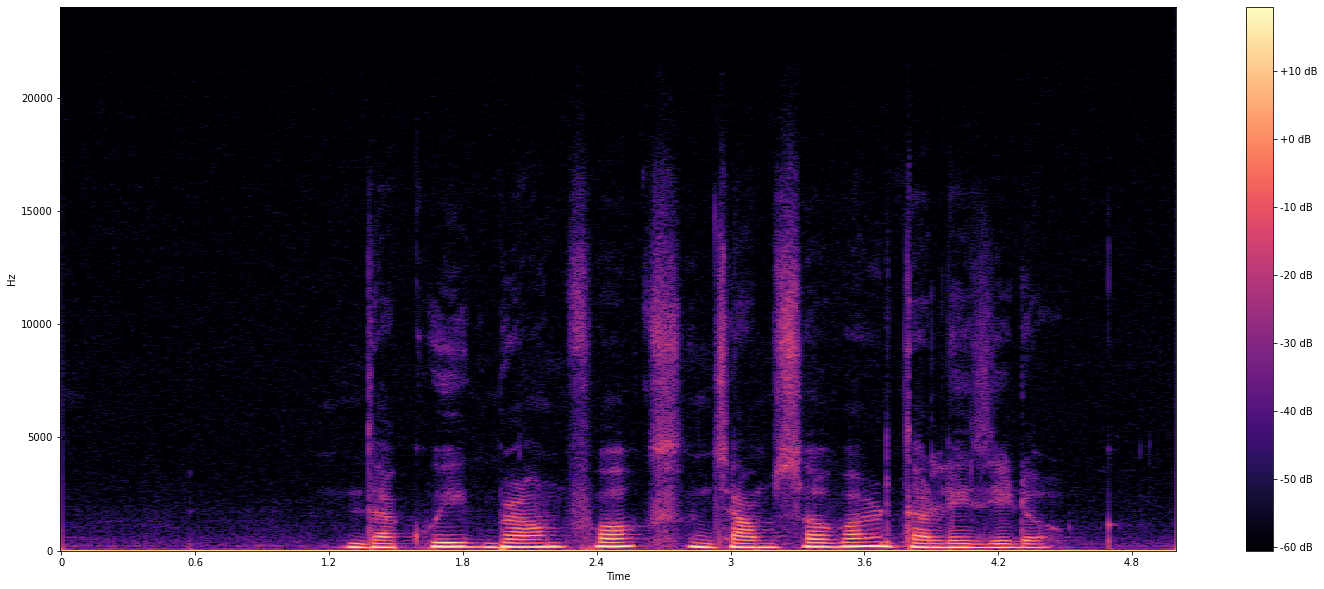

In [16]:
Y_log_fox=librosa.power_to_db(Y_fox)
plot_spectrogram(Y_log_fox,sr,HOP_SIZE)

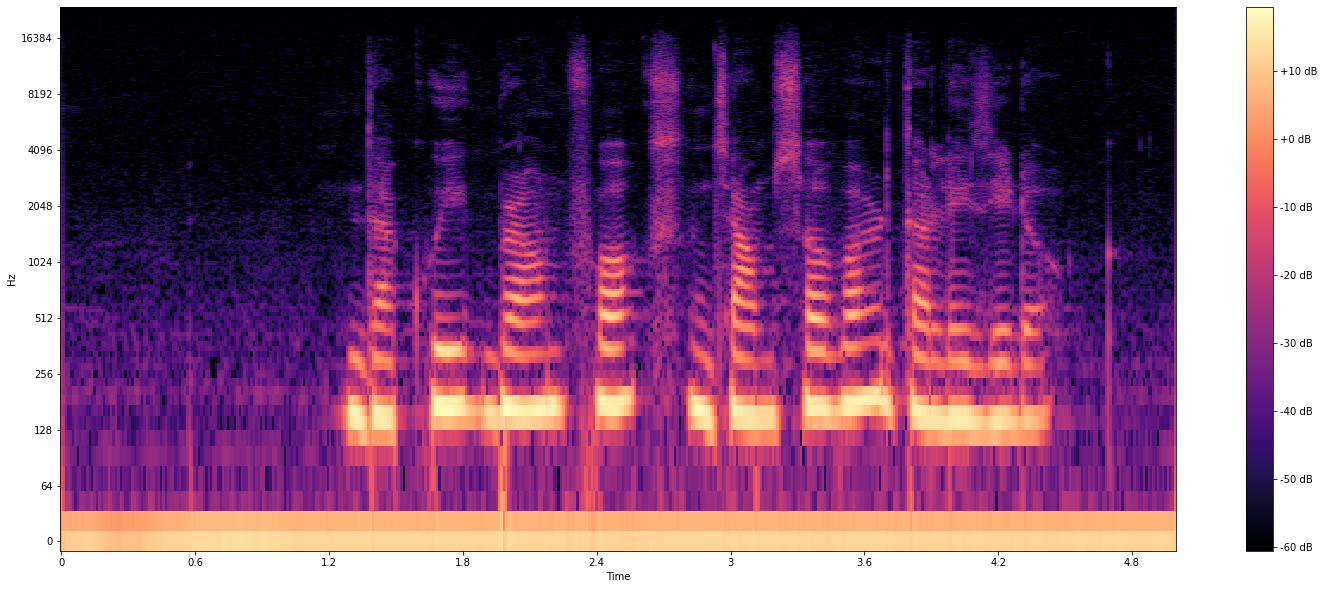

In [17]:
plot_spectrogram(Y_log_fox,sr,HOP_SIZE,y_axis="log")

In [22]:
Y_log_fox

array([[  0.       ,   0.       ,   0.       , ...,   0.       ,
          0.       ,   0.       ],
       [  2.895256 ,   5.1016703,   4.859283 , ...,   6.451659 ,
          5.985651 ,   7.0252223],
       [ -2.4527414, -11.413527 , -21.174149 , ..., -22.699478 ,
        -21.925941 ,  -5.059722 ],
       ...,
       [-60.597435 , -60.597435 , -60.597435 , ..., -60.597435 ,
        -60.597435 , -57.99328  ],
       [-60.597435 , -60.597435 , -60.597435 , ..., -60.597435 ,
        -60.597435 , -57.53837  ],
       [-60.58985  , -60.597435 , -60.597435 , ..., -60.597435 ,
        -60.597435 , -56.30821  ]], dtype=float32)

In [43]:
ft = np.fft.fft(fox)
magnitude_spectrum = np.abs(ft)
magnitude_spectrum[0] = 0 

In [44]:
fox_reconstructed = np.fft.ifft(ft)
fox_reconstructed = np.real(fox_reconstructed)

In [45]:
S_fox = librosa.stft(fox_reconstructed,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [46]:
Y_fox=np.abs(S_fox)**2

In [47]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y,
                             sr=sr,
                             hop_length=hop_length,
                             x_axis='time',
                             y_axis=y_axis)
    plt.colorbar(format="%+2.0f dB")

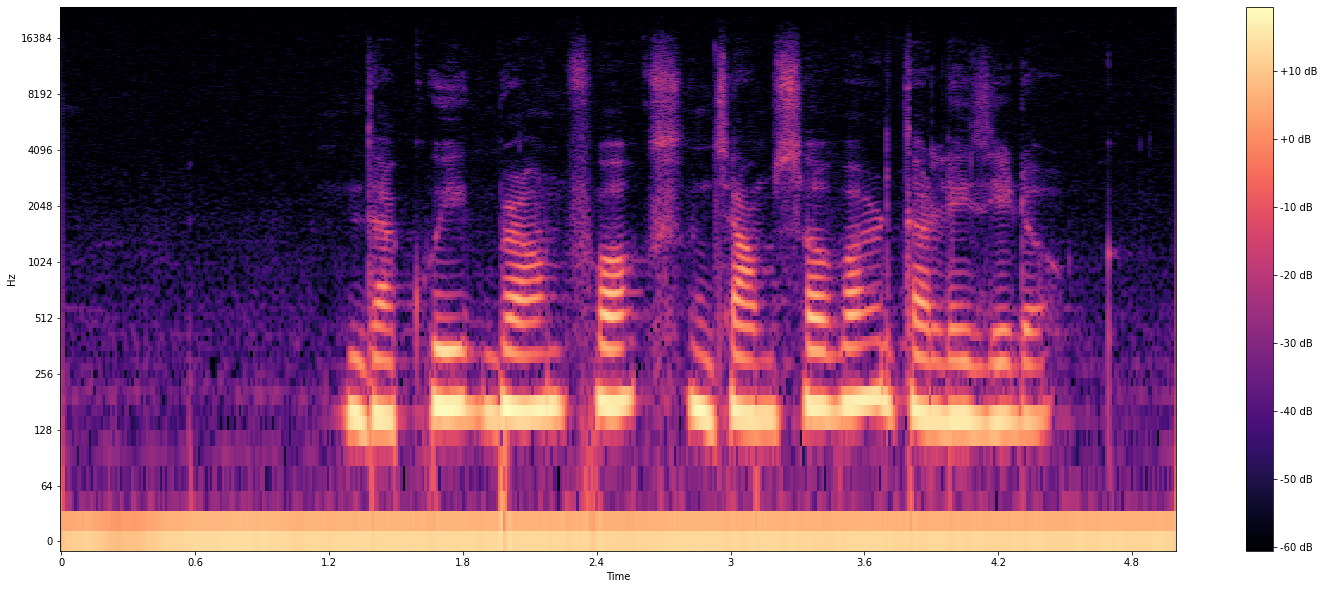

In [48]:
Y_log_fox=librosa.power_to_db(Y_fox)
plot_spectrogram(Y_log_fox,sr,HOP_SIZE,y_axis="log")

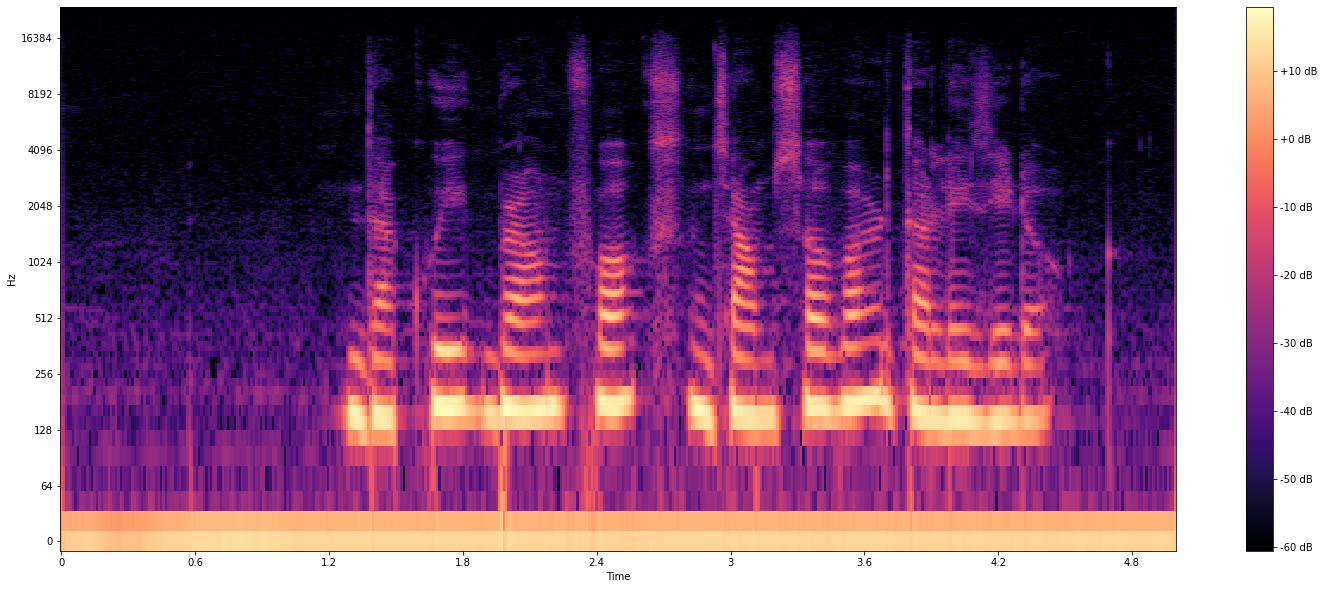

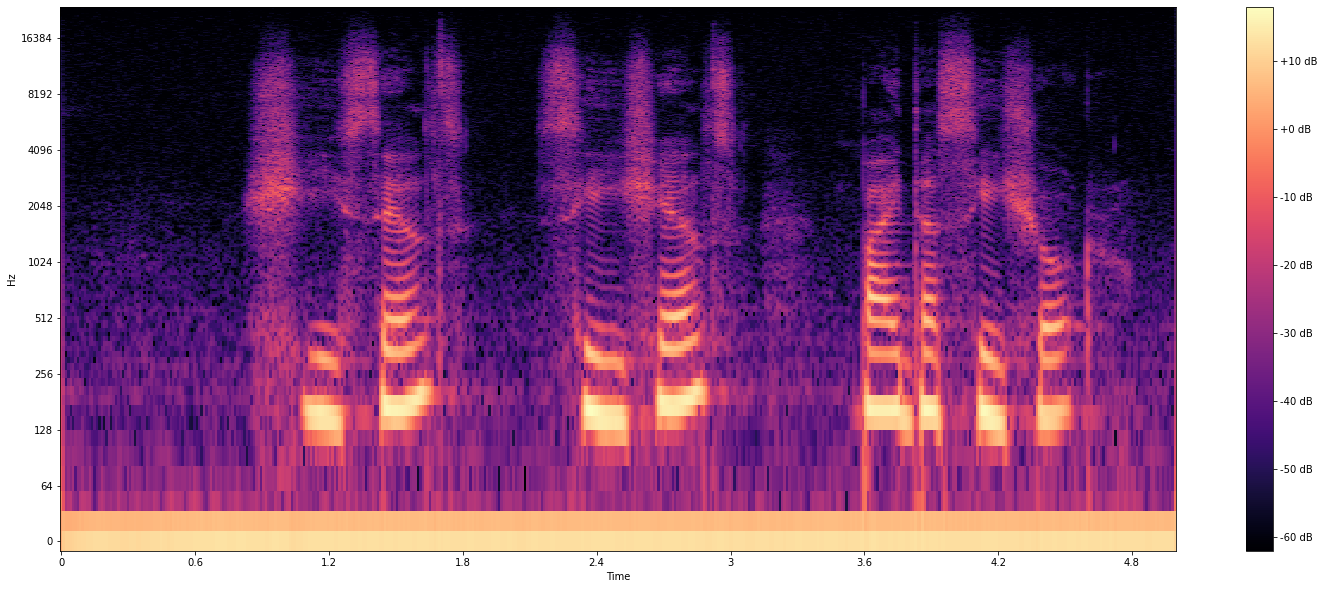

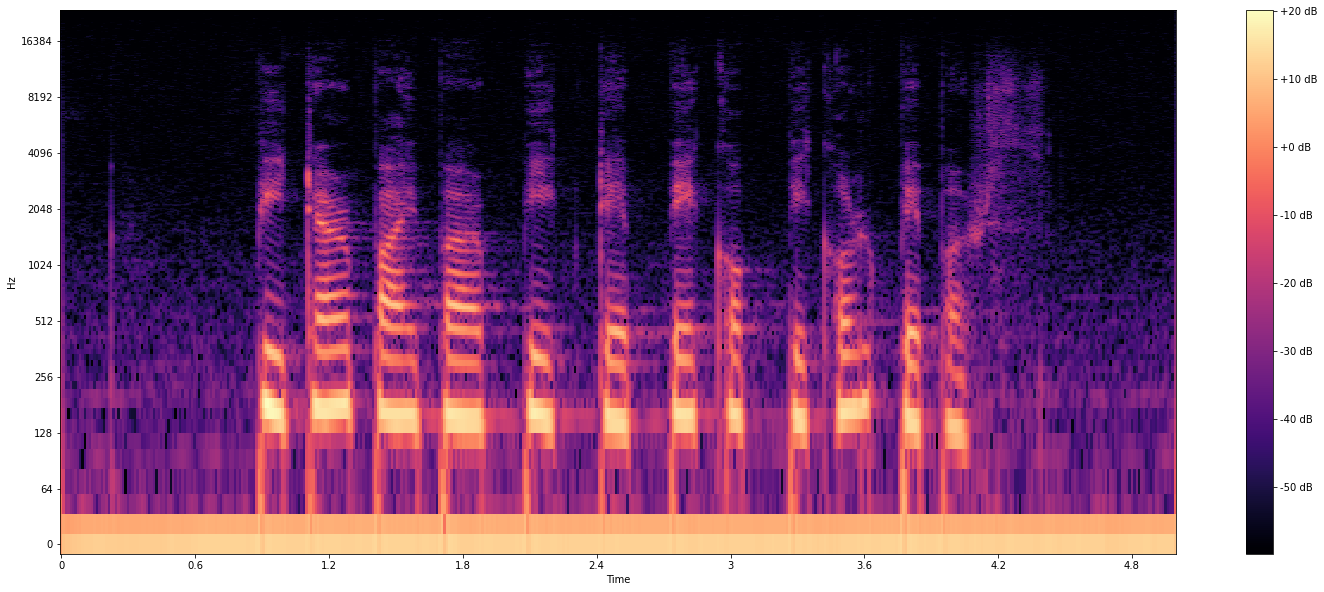

In [49]:
S_fox = librosa.stft(fox,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_s = librosa.stft(s,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
S_p = librosa.stft(p,n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

Y_fox=np.abs(S_fox)**2
Y_s=np.abs(S_s)**2
Y_p=np.abs(S_p)**2

Y_log_fox=librosa.power_to_db(Y_fox)
plot_spectrogram(Y_log_fox,sr,HOP_SIZE,y_axis="log")
Y_log_s=librosa.power_to_db(Y_s)
plot_spectrogram(Y_log_s,sr,HOP_SIZE,y_axis="log")
Y_log_p=librosa.power_to_db(Y_p)
plot_spectrogram(Y_log_p,sr,HOP_SIZE,y_axis="log")
